In [11]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)

## Load Dataset

In [12]:
df = pd.read_csv("C:/Users/LENOVO/Downloads/loan_data_2007_2014.csv")

C:\Users\LENOVO\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Descriptive Statistic

In [13]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Column | Description
:---|:---
`id` | A unique LC assigned ID for the loan listing.
`member_id ` | A unique LC assigned Id for the borrower member.
`loan_amnt` | The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
`funded_amnt` | The total amount committed to that loan at that point in time.
`funded_amnt_inv` | The total amount committed to that loan at that point in time.
`term` | The number of payments on the loan. Values are in months and can be either 36 or 60.
`int_rate` | Interest Rate on the loan
`installment` | The monthly payment owed by the borrower if the loan originates.
`grade` | LC assigned loan grade
`sub_grade` | LC assigned loan subgrade
`emp_title` | The job title supplied by the Borrower when applying for the loan.
`emp_length` | Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
`home_ownership` | The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
`annual_inc` | The self-reported annual income provided by the borrower during registration.
`verification_status` | Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified
`issue_d` | Last month payment was received
`loan_status` | Loan payment status
`pymnt_plan` | Loan payment plan
`url` | URL for the LC page with listing data.
`desc` | Loan description provided by the borrower
`purpose` | A category provided by the borrower for the loan request. 
`title` | The loan title provided by the borrower
`zip_code` | The first 3 numbers of the zip code provided by the borrower in the loan application.
`addr_state` | The state provided by the borrower in the loan application
`dti` | A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
`delinq_2yrs` | The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
`earliest_cr_line` | The date the borrower's earliest reported credit line was opened
`inq_last_6mths` | The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
`mths_since_last_delinq` | The number of months since the borrower's last delinquency.
`mths_since_last_record` | The number of months since the last public record.
`open_acc` | Number of open trades
`pub_rec` | Number of derogatory public records
`revol_bal` | Total credit revolving balance
`revol_util` | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
`total_acc` | The total number of credit lines currently in the borrower's credit file
`initial_list_status` | wholeloan platform expiration date
`out_prncp` | 
`out_prncp_inv` |
`total_pymnt` |
`total_pymnt_inv` |
`total_rec_prncp` |
`total_rec_int` |
`total_rec_late_fee` |
`recoveries` |
`collection_recovery_fee` |
`last_pymnt_d` | Last month payment was received 
`last_pymnt_amnt` | Last total payment amount received
`next_pymnt_d` | Next scheduled payment date
`last_credit_pull_d` | The most recent month LC pulled credit for this loan
`collections_12_mths_ex_med` | Number of collections in 12 months excluding medical collections
`mths_since_last_major_derog` | Months since most recent 90-day or worse rating
`policy_code` | publicly available policy_code=1; new products not publicly available policy_code=2
`application_type` | Indicates whether the loan is an individual application or a joint application with two co-borrowers
`annual_inc_joint` | The combined self-reported annual income provided by the co-borrowers during registration
`dti_joint` | A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income
`verification_status_joint` | Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified
`acc_now_delinq` | The number of accounts on which the borrower is now delinquent.
`tot_coll_amt` | Total collection amounts ever owed
`tot_cur_bal` | Total current balance of all accounts
`open_acc_6m` | Number of open trades in last 6 months
`open_il_6m` | Number of currently active installment trades
`open_il_12m` | Number of installment accounts opened in past 12 months
`open_il_24m` | Number of installment accounts opened in past 24 months
`mths_since_rcnt_il` | Months since most recent installment accounts opened
`total_bal_il` | Total current balance of all installment accounts
`il_util` | Ratio of total current balance to high credit/credit limit on all install acct
`open_rv_12m` | Number of revolving trades opened in past 12 months
`open_rv_24m` | Number of revolving trades opened in past 24 months
`max_bal_bc` | Maximum current balance owed on all revolving accounts
`all_util` | 
`total_rev_hi_lim` | Total revolving high credit/credit limit
`inq_fi` | Number of personal finance inquiries
`total_cu_tl` | Number of finance trades
`inq_last_12m` | Number of credit inquiries in past 12 months

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [15]:
df.isna().sum()

Unnamed: 0                          0
id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       27588
emp_length                      21008
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           340302
purpose                             0
title                              20
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs 

- pada kolom `annual_inc_joint`,`dti_joint`,`verification_status_joint`,`open_acc_6m`,`open_il_6m`,`open_il_12m`,`open_il_24m`,`mths_since_rcnt_il`,`total_bal_il`,`il_util`,`open_rv_12m`,`open_rv_24m`,`max_bal_bc`,`all_util`,`inq_fi`,`total_cu_tl`,`inq_last_12m` seluruh barisnya bernilai null, sepertinya akan didrop saat pre processing
- pada kolom `desc`,`mths_since_last_delinq`,`mths_since_last_record`,`next_payment_d`, dan `mths_since_last_major_derog` lebih dari setengah barisnya memiliki nilai null, mungkin akan dilakukan imputasi saat preprocessing
- pada kolom `emp_title`,`emp_length`,`tot_coll_amt`,`tot_cur_bal`, dan `total_rev_hi_lim` memiliki nilai null tidak terlalu banyak, akan dilakukan imputasi saat pre processing
- pada kolom `title`,`delinq_2yrs`,`earliest_cr_line`,`inq_last_6mths`,`open_acc`,`pub_rec`,`revol_util`,`total_acc`,`last_pymnt_d`,`last_credit_pull_d`,`collections_12_mths_ex_med`, dan `acc_now_delinq` memiliki sedikit nilai null, sepertinya akan didrop saat pre processing

In [16]:
nums = [key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['float64', 'int64']]
cats = [key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['object']]

In [17]:
df[nums].describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,0.0,0.0,0.0,466256.000000,3.960090e+05,3.960090e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,NaN,NaN,NaN,0.004002,1.919135e+02,1.388017e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,NaN,NaN,NaN,0.068637,1.463021e+04,1.521147e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.861800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,8.153900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.089530e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [18]:
df[cats].describe()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
count,466285,466285,466285,438697,445277,466285,466285,466285,466285,466285,466285,125983,466285,466265,466285,466285,466256,466285,465909,239071,466243,466285
unique,2,7,35,205475,11,6,3,91,9,2,466285,124436,14,63099,888,50,664,2,98,100,103,1
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,,debt_consolidation,Debt consolidation,945xx,CA,Oct-00,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL
freq,337953,136929,31686,5399,150049,235875,168055,38782,224226,466276,1,234,274195,164075,5304,71450,3674,303005,179620,208393,327699,466285


In [19]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom term:
 36 months    337953
 60 months    128332
Name: term, dtype: int64

Value count kolom grade:
B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: grade, dtype: int64

Value count kolom sub_grade:
B3    31686
B4    30505
C1    26953
C2    26740
B2    26610
C3    25317
B5    25252
C4    24105
B1    22876
C5    22178
A5    21757
D1    19261
A4    19045
D2    17046
D3    14916
D4    14099
A3    12568
D5    11566
A2    10956
A1    10541
E1     9033
E2     8669
E3     6976
E4     5992
E5     5087
F1     3940
F2     3001
F3     2708
F4     2067
F5     1513
G1     1109
G2      823
G3      583
G4      422
G5      385
Name: sub_grade, dtype: int64

Value count kolom emp_title:
Teacher                              5399
Manager                              4438
Registered Nurse                     2316
RN                                   2204
Supervisor                           1967
                                     ... 
The Eastern

## Data Preparation

### Grouping Loan Condition into Good Loan and Bad Loan

In [20]:
# grouping bad loan conditions in variable
bad_loan = ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off", "In Grace Period", 
            "Late (16-30 days)", "Late (31-120 days)"]

# making loan condition column
df['loan_condition'] = np.nan

def loan_condition(status):
    if status in bad_loan:
        return 'Bad Loan'
    else:
        return 'Good Loan'
    
df['loan_condition'] = df['loan_status'].apply(loan_condition)

In [21]:
df['loan_condition'].value_counts()

Good Loan    410953
Bad Loan      55332
Name: loan_condition, dtype: int64

### Extracting Year from Issue_d column

In [22]:
# extracting string using delimiter to gain month and year column

df[['Month', 'Year']] = df['issue_d'].str.split('-', expand=True)

df[['Month', 'Year']].head()

,Month,Year
0,Dec,11
1,Dec,11
2,Dec,11
3,Dec,11
4,Dec,11


In [23]:
df['Year'] = df['Year'].replace(['07','08','09','10','11','12','13','14'],[2007,2008,2009,2010,2011,2012,2013,2014])

### Grouping Home Status into MORTGAGE, RENT, OWN and OTHER

In [24]:
other = ['OTHER','NONE','ANY']

df['home_ownership_status'] = np.nan

def home_status(status):
    if status in other:
        return 'OTHER'
    elif status == 'RENT':
        return 'RENT'
    elif status == 'OWN':
        return 'OWN'
    else:
        return 'MORTGAGE'

df['home_ownership_status'] = df['home_ownership'].apply(home_status)

In [25]:
df['home_ownership_status'].value_counts()

MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          233
Name: home_ownership_status, dtype: int64

### Grouping Income Category into LOW, MEDIUM and HIGH

In [26]:
df['income_category'] = df.apply(lambda x: 'High' if x['annual_inc'] > 200000 else ('Medium' if x['annual_inc'] > 100000 and x['annual_inc'] <= 200000 else 'Low'), axis=1)

In [27]:
df['income_category'].value_counts()

Low       388628
Medium     69857
High        7800
Name: income_category, dtype: int64

In [28]:
df['emp_length'].value_counts()

10+ years    150049
2 years       41373
3 years       36596
< 1 year      36265
5 years       30774
1 year        29622
4 years       28023
7 years       26180
6 years       26112
8 years       22395
9 years       17888
Name: emp_length, dtype: int64

### Grouping Employee Length into '< 5 Years', '5-10 Years',and '> 10 Years'

In [29]:
under5 = ['< 1 year','2 years','3 years','4 years']
under10 = ['5 years','6 years','7 years','8 years','9 years']

df['emp_length_category'] = np.nan

def emp_cat(status):
    if status in under5:
        return '< 5 years'
    elif status in under10:
        return '5-10 years'
    else:
        return '> 10 years'
    
df['emp_length_category'] = df['emp_length'].apply(emp_cat)

In [30]:
df['emp_length_category'].value_counts()

> 10 years    200679
< 5 years     142257
5-10 years    123349
Name: emp_length_category, dtype: int64

### Grouping delinq 2 years into 1(Yes) and 0(No)

In [31]:
df['delinq_2yrs'].value_counts()

0.0     382954
1.0      56224
2.0      16310
3.0       5684
4.0       2378
5.0       1236
6.0        629
7.0        346
8.0        177
9.0        111
10.0        65
11.0        41
12.0        38
13.0        25
14.0         8
15.0         7
18.0         6
16.0         5
17.0         3
19.0         3
21.0         2
22.0         2
29.0         1
24.0         1
Name: delinq_2yrs, dtype: int64

In [32]:
df['delinq_2yrs_status'] = np.nan

def delinq_stat(status):
    if status == 0:
        return 0
    else:
        return 1
    
df['delinq_2yrs_status'] = df['delinq_2yrs'].apply(delinq_stat)

In [33]:
df['delinq_2yrs_status'].value_counts()

0    382954
1     83331
Name: delinq_2yrs_status, dtype: int64

## Exploratory Data Analysis

### Exploring Loan Purpose Percentage

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


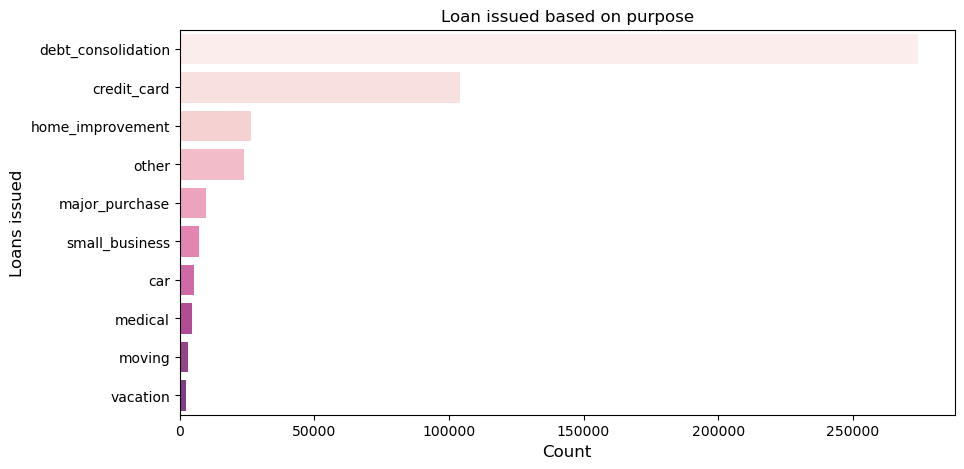

In [135]:
purpose_count = df['purpose'].value_counts()
purpose_count = purpose_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(purpose_count.values, purpose_count.index, alpha=0.8,palette='RdPu')
plt.title('Loan issued based on purpose')
plt.ylabel('Loans issued', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.show()

The majority of loan purposes are credit card (59%) and car (22%), with the rest having less than 10%.

### Exploring 'loan_amnt','funded_amnt', and 'funded_amnt_inv' Distribution

In [35]:
df[['loan_amnt','funded_amnt','funded_amnt_inv']].value_counts()

loan_amnt  funded_amnt  funded_amnt_inv
10000      10000        10000.00000        28664
12000      12000        12000.00000        21715
15000      15000        15000.00000        19444
20000      20000        20000.00000        18050
8000       8000         8000.00000         13217
                                           ...  
13000      13000        11975.00000            1
                        12017.10292            1
                        12030.25461            1
                        12136.24000            1
500        500          125.00000              1
Length: 17600, dtype: int64

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

Text(0.5, 1.0, 'Amount Committed by Investors')

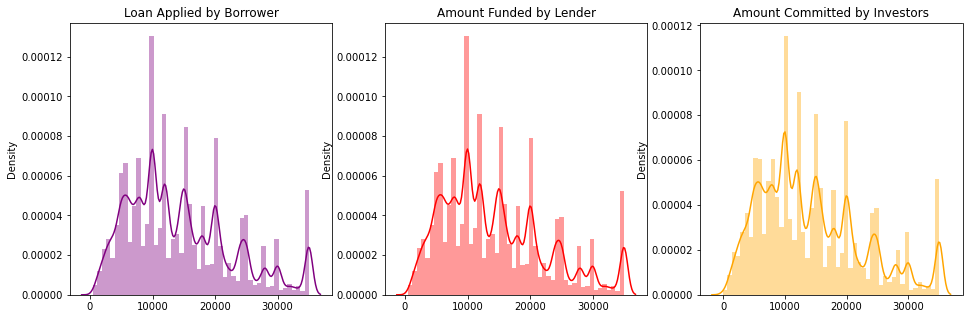

In [36]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))

sns.distplot(df['loan_amnt'].values, ax=ax[0],color='purple')
ax[0].set_title('Loan Applied by Borrower')
sns.distplot(df['funded_amnt'].values, ax=ax[1],color='red')
ax[1].set_title('Amount Funded by Lender')
sns.distplot(df['funded_amnt_inv'].values, ax=ax[2],color='orange')
ax[2].set_title('Amount Committed by Investors')

- We can see that the `Loan applied by Borrower`, `Amount Funded by Lender`, and `Amount Commited by Investors` have the same distribution, which can be interpreted to mean that every borrower who passes the qualification gets a loan with the same amount that was submitted.
- It can be seen that the figure $10000 is the most frequently used loan amount.

### Average Loan Amount Issued per Year

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Average loan amount issued')

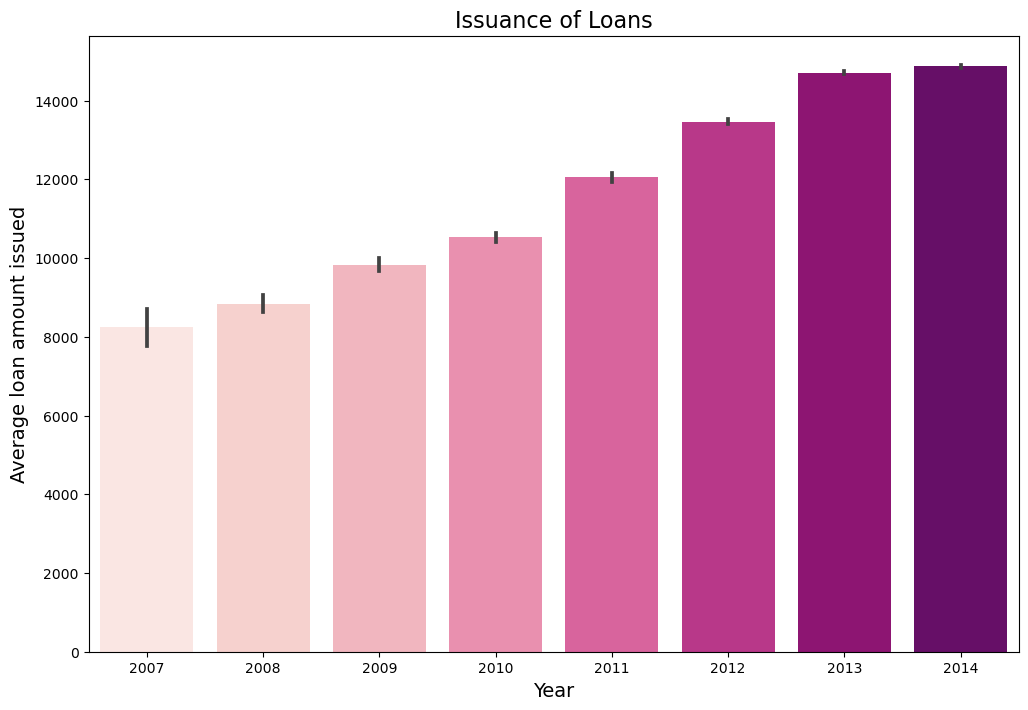

In [136]:
plt.figure(figsize=(12,8))
sns.barplot('Year', 'loan_amnt', data=df, palette='RdPu')
plt.title('Issuance of Loans', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average loan amount issued', fontsize=14)

It appears that the average loan amount issued is increasing year after year.

### Loan Condition Percentage per Year

[Text(0, 0.5, 'Percentage(%)')]

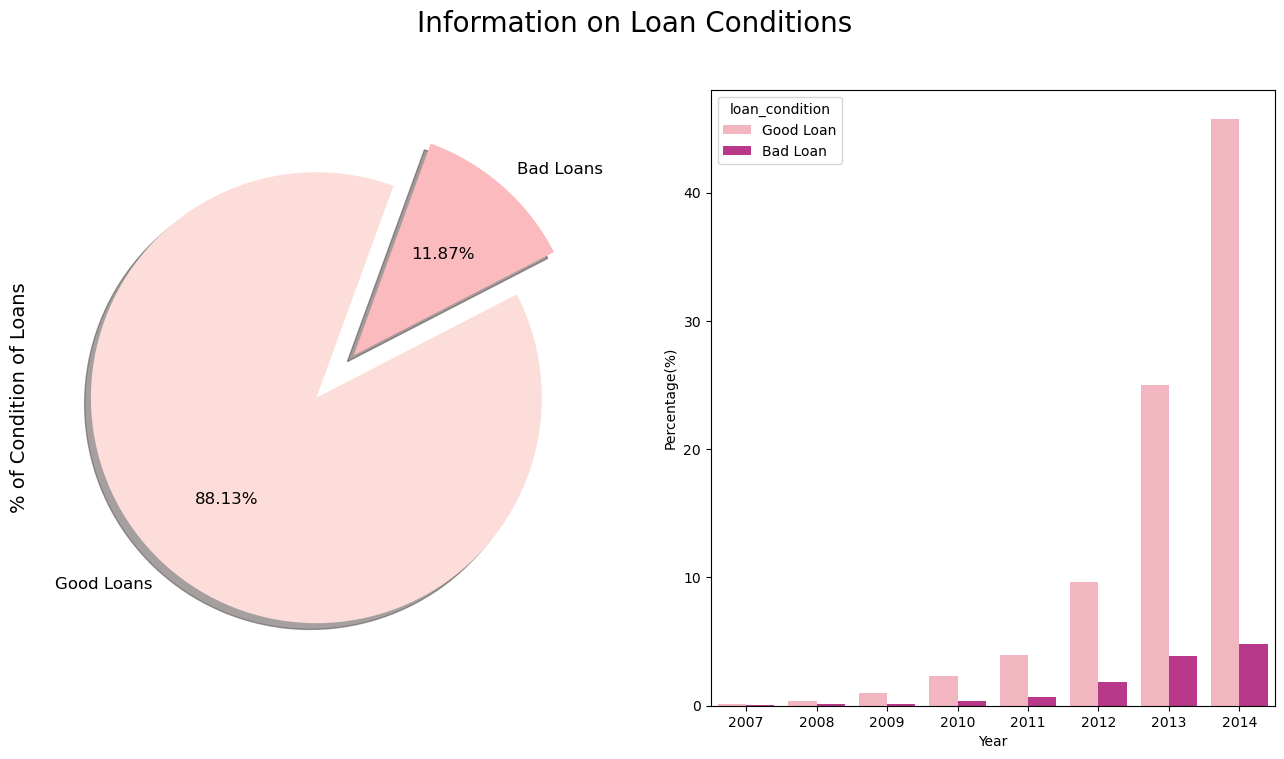

In [137]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = (sns.color_palette('RdPu'))
labels ="Good Loans", "Bad Loans"

plt.suptitle('Information on Loan Conditions', fontsize=20)

df["loan_condition"].value_counts().plot.pie(explode=[0,0.25],autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)

ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

sns.barplot(x="Year", y="loan_amnt", hue="loan_condition", data=df, palette='RdPu', estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="Percentage(%)")

- According to `Loan Condition`, the largest percentage is dominated by 'Good Loans' (88.13%) and 'Bad Loans'(11.87%)
- It is also clear that the condition of each 'Loan Condition' has improved year after year.

### Loan Information by Home Ownership Status

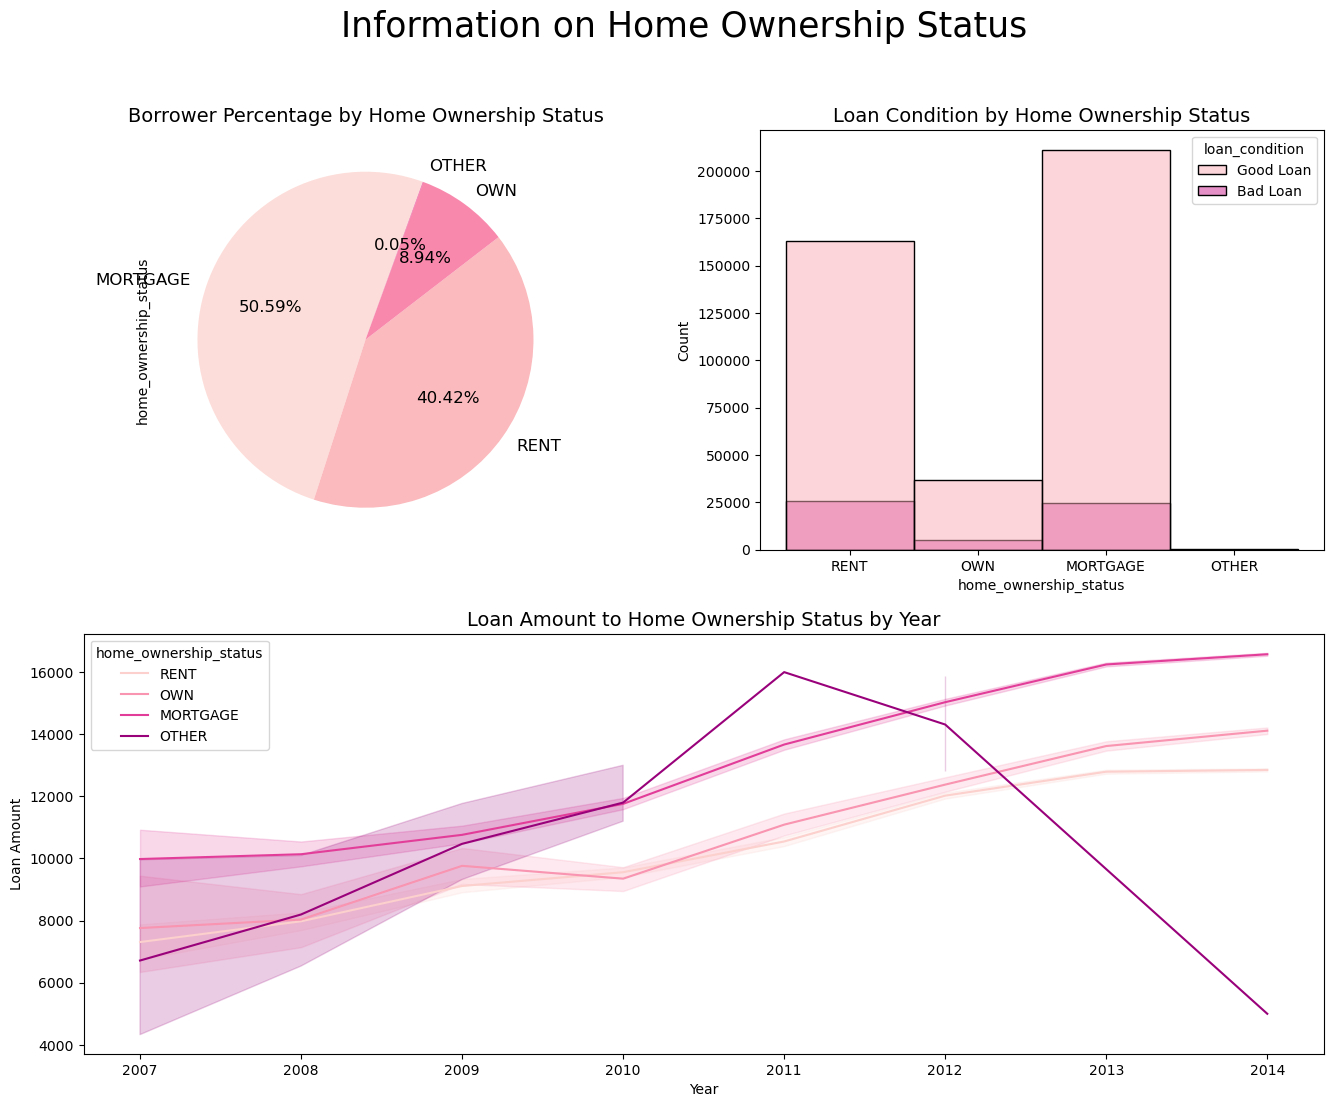

In [138]:
fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

plt.suptitle('Information on Home Ownership Status', fontsize=25)

df["home_ownership_status"].value_counts().plot(kind='pie',autopct='%1.2f%%', ax=ax1, colors=(sns.color_palette('RdPu')), 
                                             labels=['MORTGAGE','RENT','OWN','OTHER'], fontsize=12, startangle=70)
ax1.set_title('Borrower Percentage by Home Ownership Status', fontsize=14)

sns.histplot(x=df['home_ownership_status'],hue=df['loan_condition'],ax=ax2,palette='RdPu')
ax2.set_title('Loan Condition by Home Ownership Status', fontsize=14)
ax2.set(ylabel="Count")

sns.lineplot(x=df['Year'],y=df['loan_amnt'],hue=df['home_ownership_status'],ax=ax3,palette='RdPu')
ax3.set_title('Loan Amount to Home Ownership Status by Year', fontsize=14)
ax3.set(ylabel="Loan Amount")


plt.show()

- the borrower with `MORTGAGE` status have the highest percentafe amount filed
- all the sub category dominated by `Good Loan`
- Borrowers with 'OTHER' status have been decreasing since 2011, while the rest have been increasing year after year.

### The Importance of Credit Score

<Figure size 1500x1200 with 0 Axes>

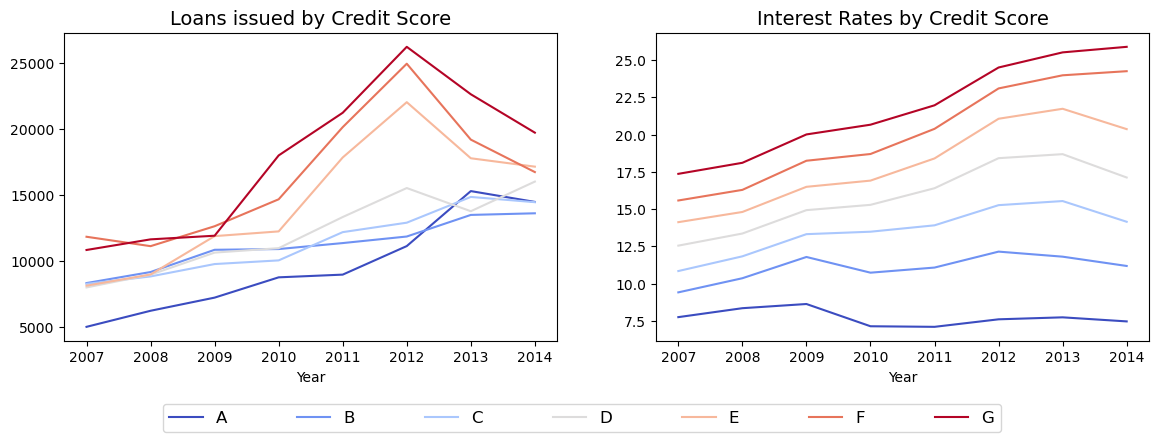

In [91]:
plt.figure(figsize=(15,12))
f, ((ax1, ax2)) = plt.subplots(1, 2)
cmap = plt.cm.coolwarm

by_credit_score = df.groupby(['Year', 'grade']).loan_amnt.mean()
by_credit_score.unstack().plot(legend=False, ax=ax1, figsize=(14, 4), colormap=cmap)
ax1.set_title('Loans issued by Credit Score', fontsize=14)
    
    
by_inc = df.groupby(['Year', 'grade']).int_rate.mean()
by_inc.unstack().plot(ax=ax2, figsize=(14, 4), colormap=cmap)
ax2.set_title('Interest Rates by Credit Score', fontsize=14)

ax2.legend(bbox_to_anchor=(-1.0, -0.3, 1.7, 0.1), loc=5, prop={'size':12},
           ncol=7, mode="expand", borderaxespad=0.)

According to the plot, better borrowers have a lower loan amount issued and an interest rate. And the poorer the borrower's grade, the larger the loan amount issued and the higher the interest rate.

### Income Category Distribution by Grade

Text(0.5, 1.0, 'Income Category Percentage by Grade')

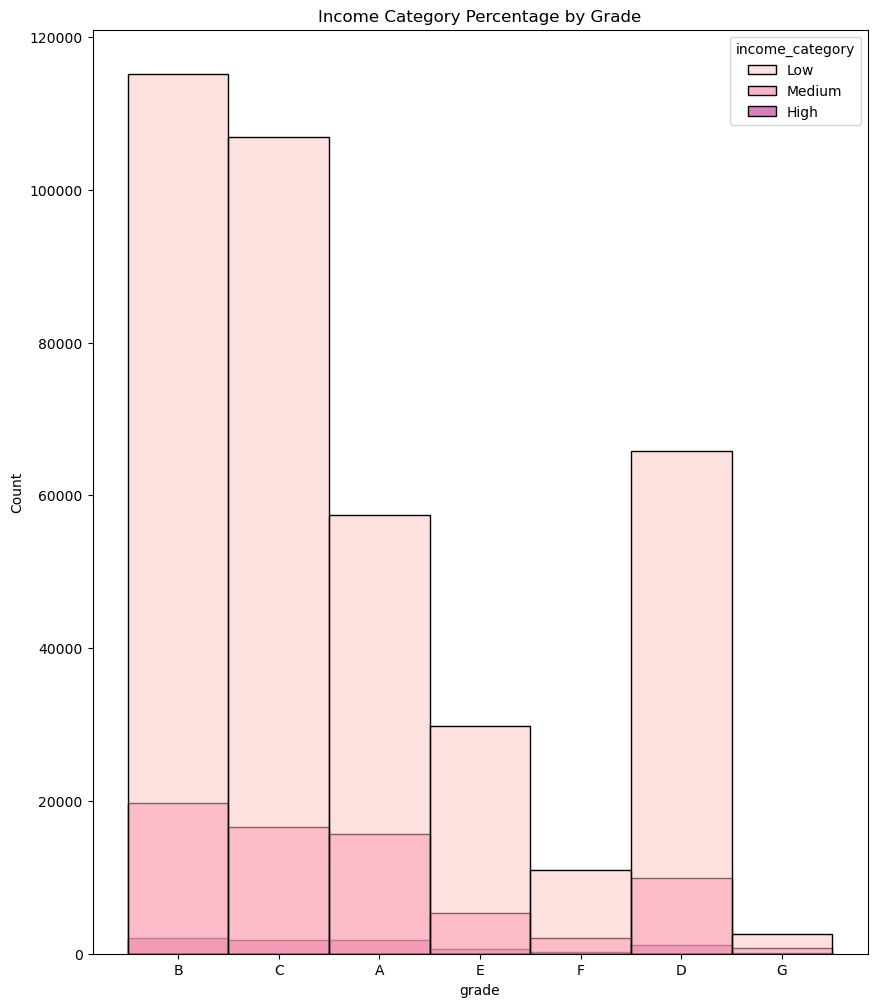

In [139]:
plt.figure(figsize=(10,12))
sns.histplot(x=df['grade'],hue=df['income_category'],palette='RdPu')
plt.title("Income Category Percentage by Grade")

Borrowers with low income account for the highest percentage of all grades.

### Loan Information by Income Category

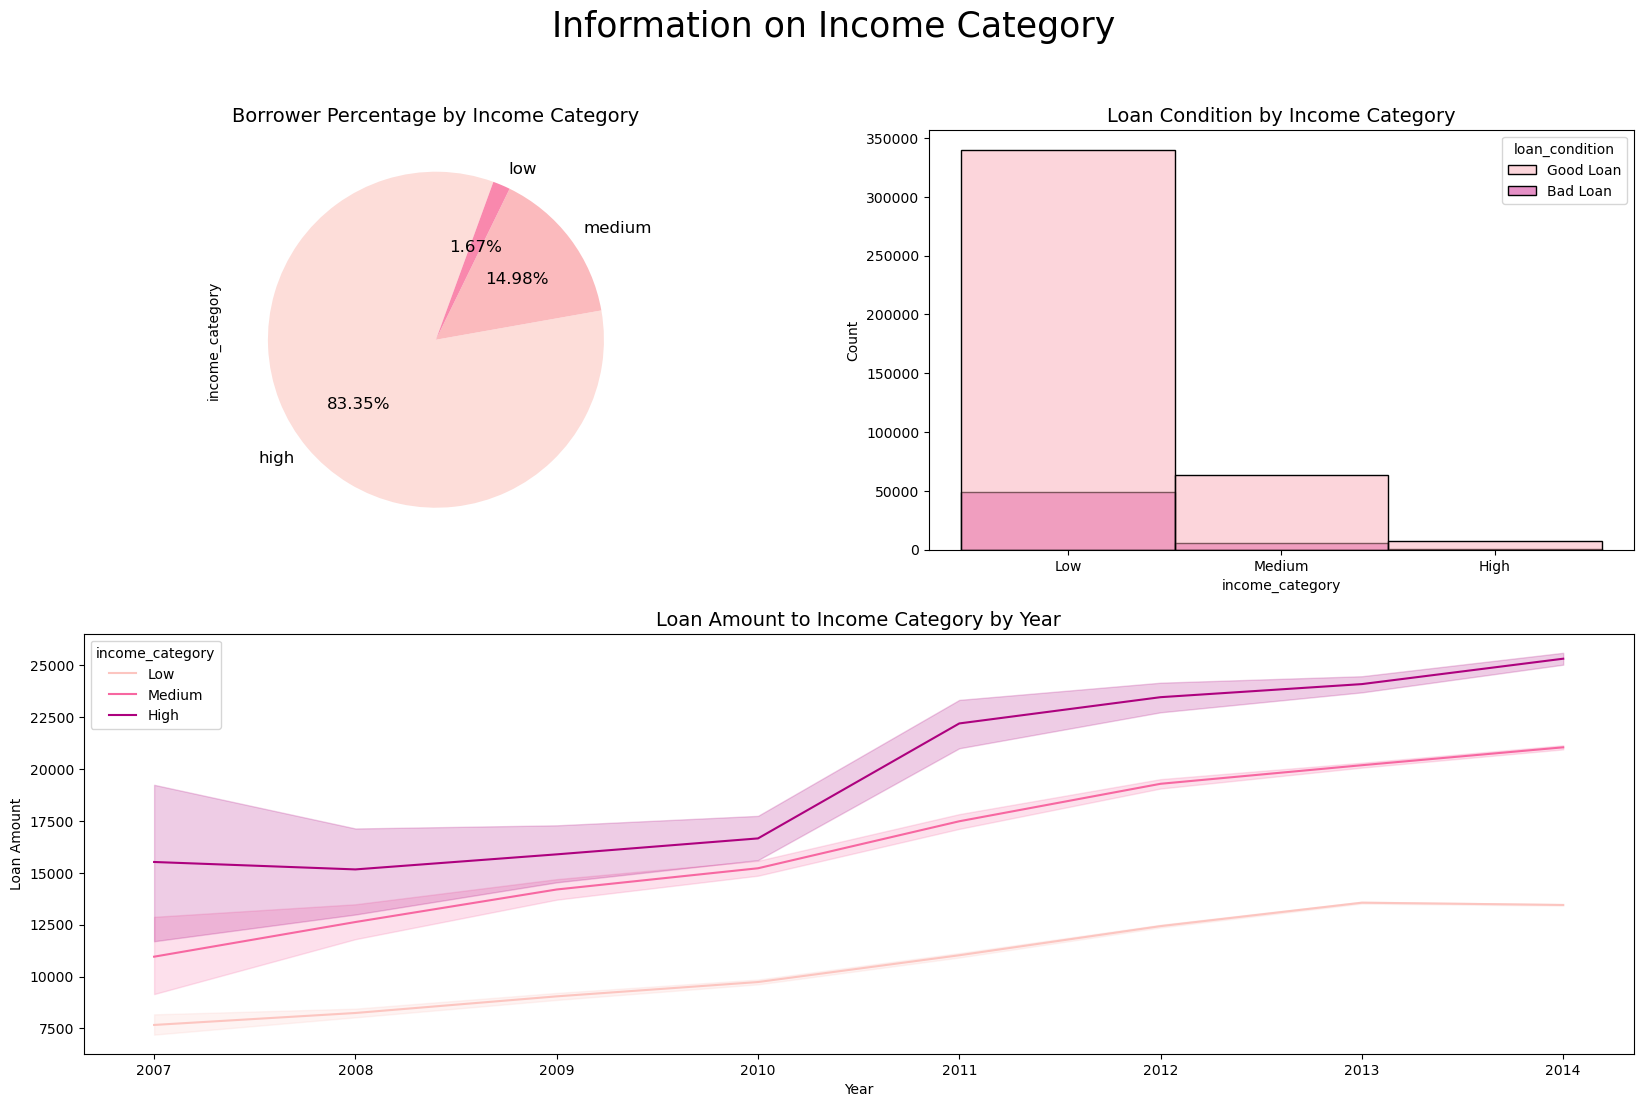

In [140]:
fig = plt.figure(figsize=(20,12))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

plt.suptitle('Information on Income Category', fontsize=25)

df["income_category"].value_counts().plot(kind='pie',autopct='%1.2f%%', ax=ax1, colors=(sns.color_palette('RdPu')), 
                                             labels=['high','medium','low'], fontsize=12, startangle=70)
ax1.set_title('Borrower Percentage by Income Category', fontsize=14)

sns.histplot(x=df['income_category'],hue=df['loan_condition'],ax=ax2,palette='RdPu')
ax2.set_title('Loan Condition by Income Category', fontsize=14)
ax2.set(ylabel="Count")

sns.lineplot(x=df['Year'],y=df['loan_amnt'],hue=df['income_category'],ax=ax3,palette='RdPu')
ax3.set_title('Loan Amount to Income Category by Year', fontsize=14)
ax3.set(ylabel="Loan Amount")


plt.show()

- borrower with high income have the largest percentage
- all the sub category dominated by Good Loan
- loan ammount of all borrower's income category is increasing year after year

### Loan Amount VS Total Payment

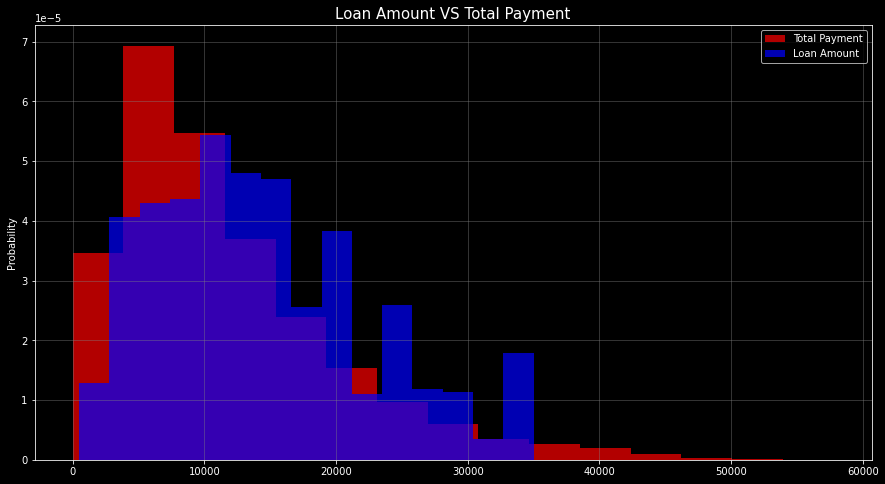

In [43]:
plt.style.use('dark_background')
plt.figure(figsize=(15,8))
plt.hist(df['total_pymnt'], color='Red', label='Total Payment', alpha=0.7, density=True, bins=15)
plt.hist(df['loan_amnt'], color='Blue', label='Loan Amount', alpha=0.7, density=True, bins=15)
plt.title('Loan Amount VS Total Payment',size=15)
plt.ylabel("Probability")
plt.grid(color='grey',alpha=0.5)
plt.legend()
plt.show()

Loan Amount and Total Payment have a similar distribution, implying that nearly all borrowers pay the same amount borrowed.

### Loan Information by Employee length Category

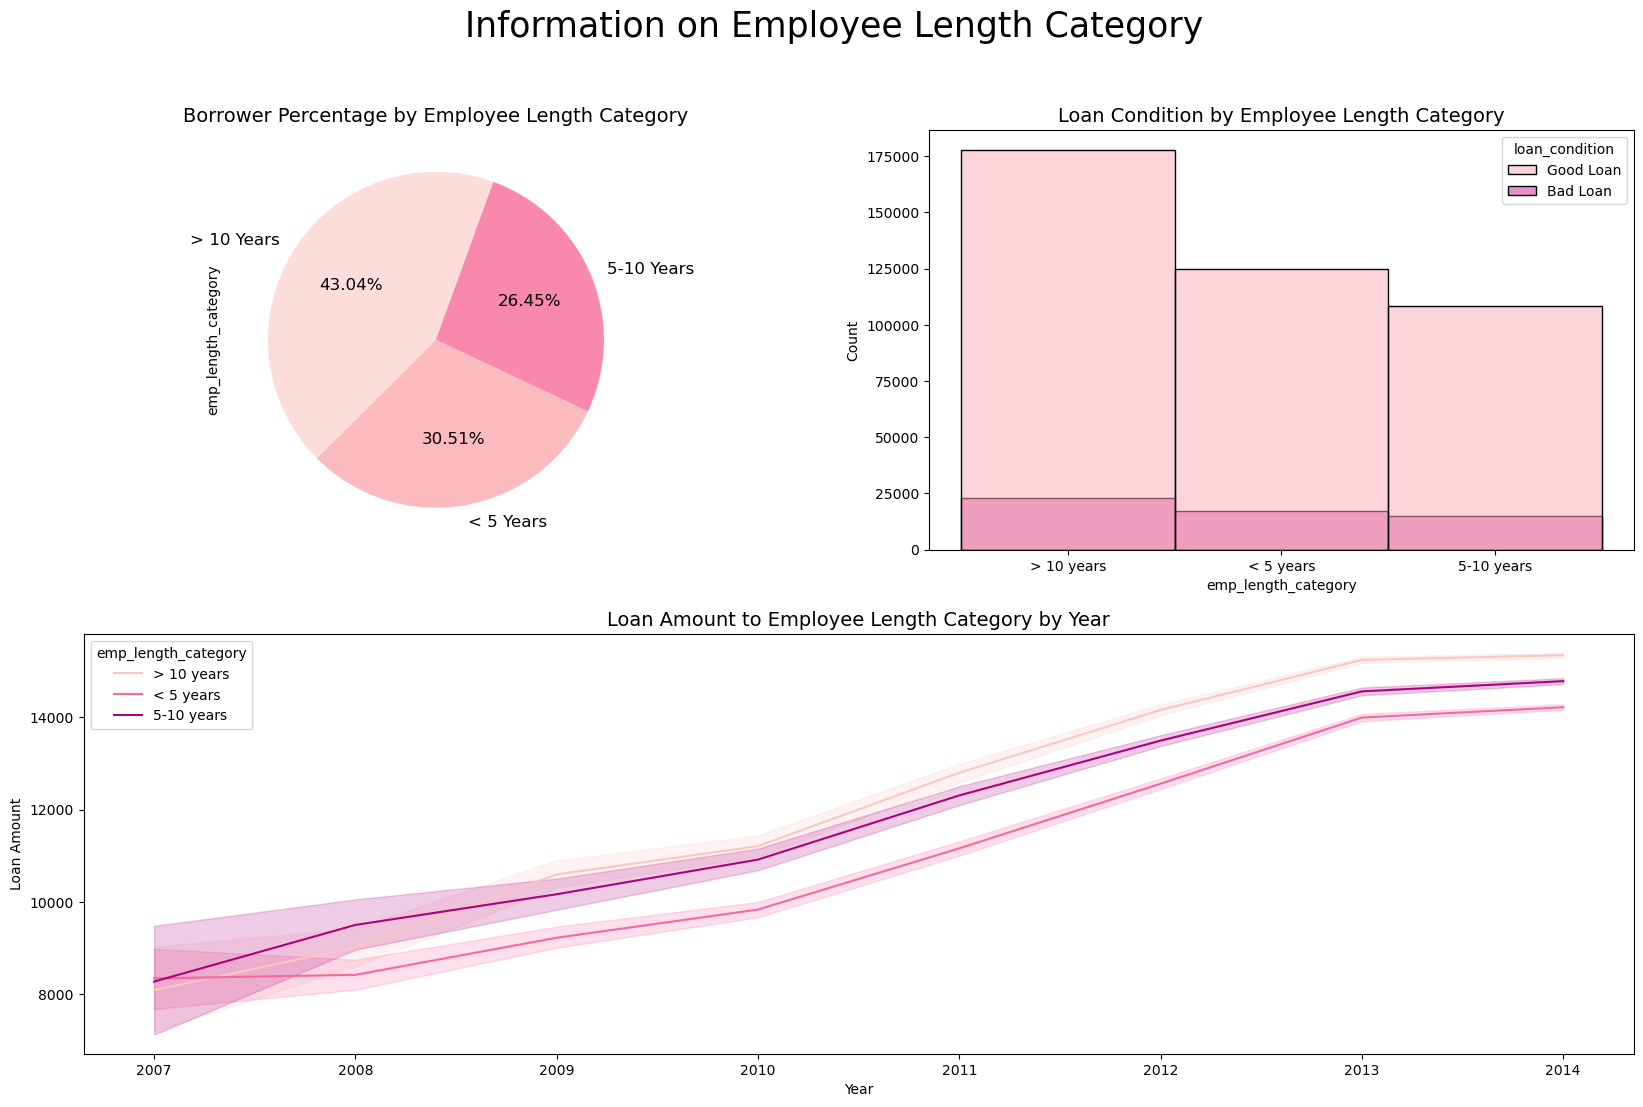

In [141]:
plt.style.use('default')
fig = plt.figure(figsize=(20,12))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

plt.suptitle('Information on Employee Length Category', fontsize=25)

df["emp_length_category"].value_counts().plot(kind='pie',autopct='%1.2f%%', ax=ax1, colors=(sns.color_palette('RdPu')), 
                                             labels=['> 10 Years','< 5 Years','5-10 Years'], fontsize=12, startangle=70)
ax1.set_title('Borrower Percentage by Employee Length Category', fontsize=14)

sns.histplot(x=df['emp_length_category'],hue=df['loan_condition'],ax=ax2,palette='RdPu')
ax2.set_title('Loan Condition by Employee Length Category', fontsize=14)
ax2.set(ylabel="Count")

sns.lineplot(x=df['Year'],y=df['loan_amnt'],hue=df['emp_length_category'],ax=ax3,palette='RdPu')
ax3.set_title('Loan Amount to Employee Length Category by Year', fontsize=14)
ax3.set(ylabel="Loan Amount")


plt.show()

- borrower with more than 10 years working expereience have the largest percentage, and the rest have similar percentage
- all the sub category dominated by Good Loan
- loan ammount of all sub category is increasing year after year

### Loan Information by Delinquent Status

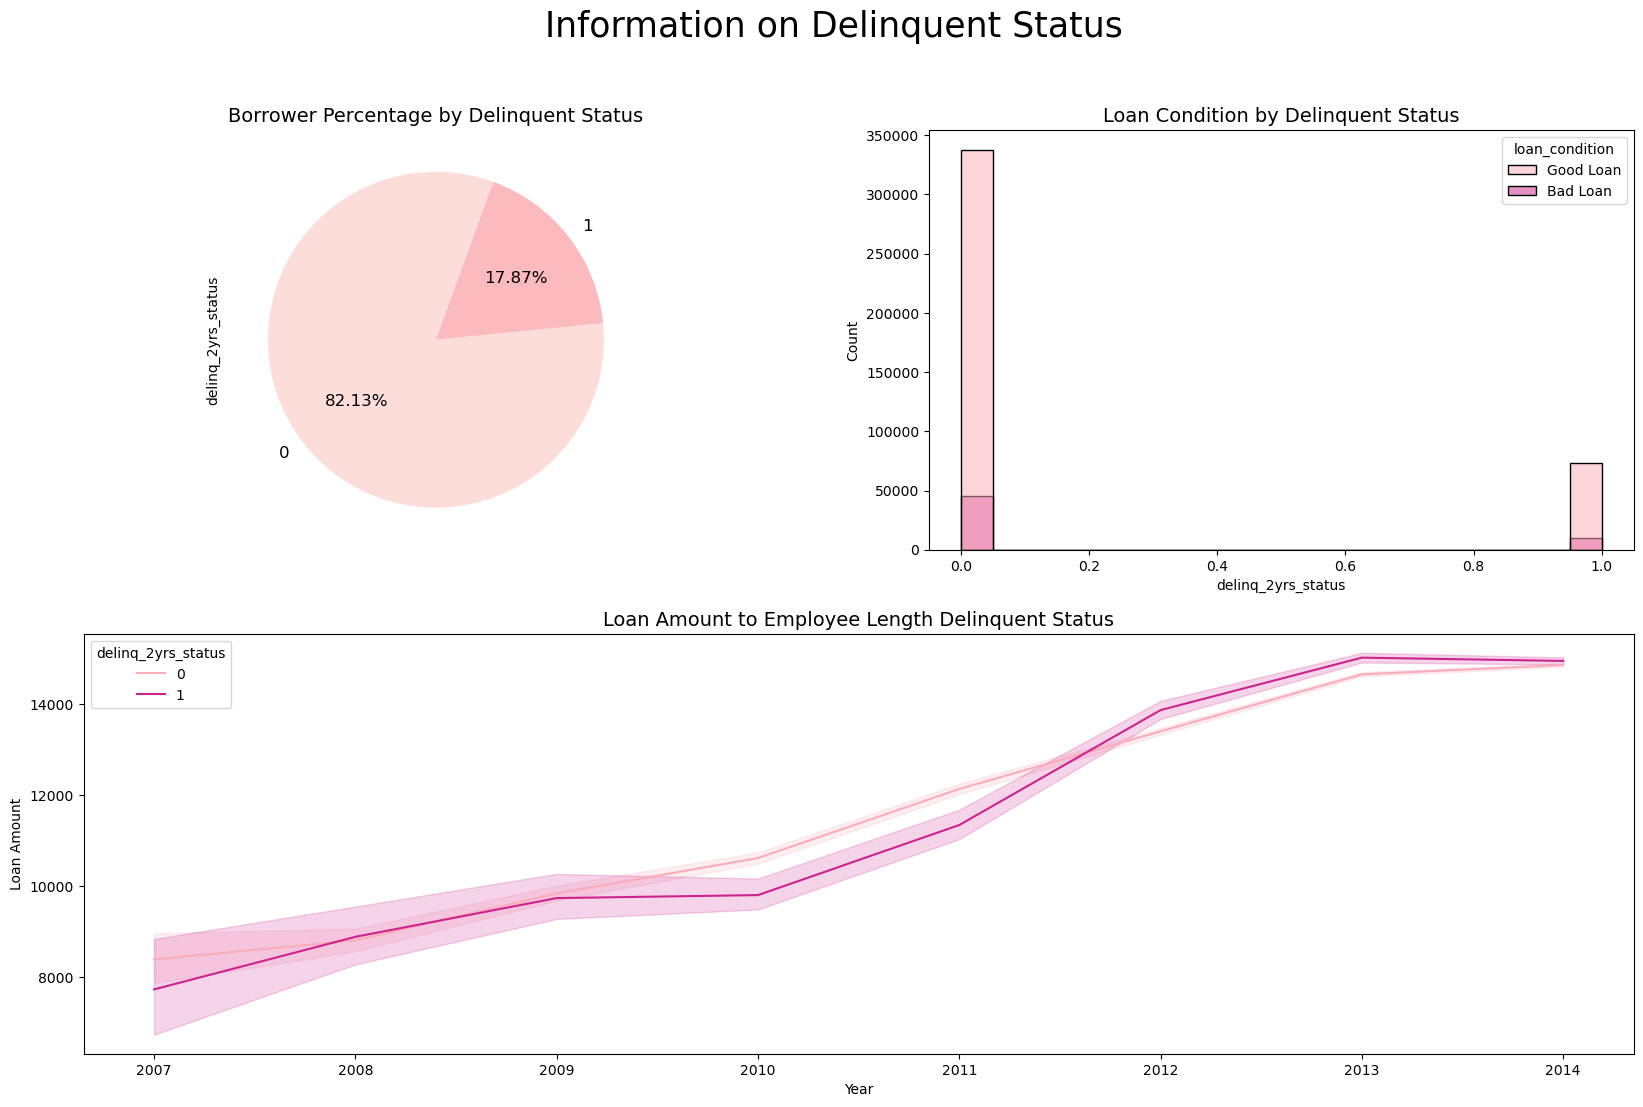

In [142]:
plt.style.use('default')
fig = plt.figure(figsize=(20,12))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

plt.suptitle('Information on Delinquent Status', fontsize=25)

df["delinq_2yrs_status"].value_counts().plot(kind='pie',autopct='%1.2f%%', ax=ax1, colors=(sns.color_palette('RdPu')), 
                                             labels=[0,1], fontsize=12, startangle=70)
ax1.set_title('Borrower Percentage by Delinquent Status', fontsize=14)

sns.histplot(x=df['delinq_2yrs_status'],hue=df['loan_condition'],ax=ax2,palette='RdPu')
ax2.set_title('Loan Condition by Delinquent Status', fontsize=14)
ax2.set(ylabel="Count")

sns.lineplot(x=df['Year'],y=df['loan_amnt'],hue=df['delinq_2yrs_status'],ax=ax3,palette='RdPu')
ax3.set_title('Loan Amount to Employee Length Delinquent Status', fontsize=14)
ax3.set(ylabel="Loan Amount")


plt.show()

- Borrowers with no delinquency have the highest percentage.
- Good Loan dominates both borrower delinquency statuses.
- Borrower with both delinquency statuses is increasing year after year.

### Loan Information by Term

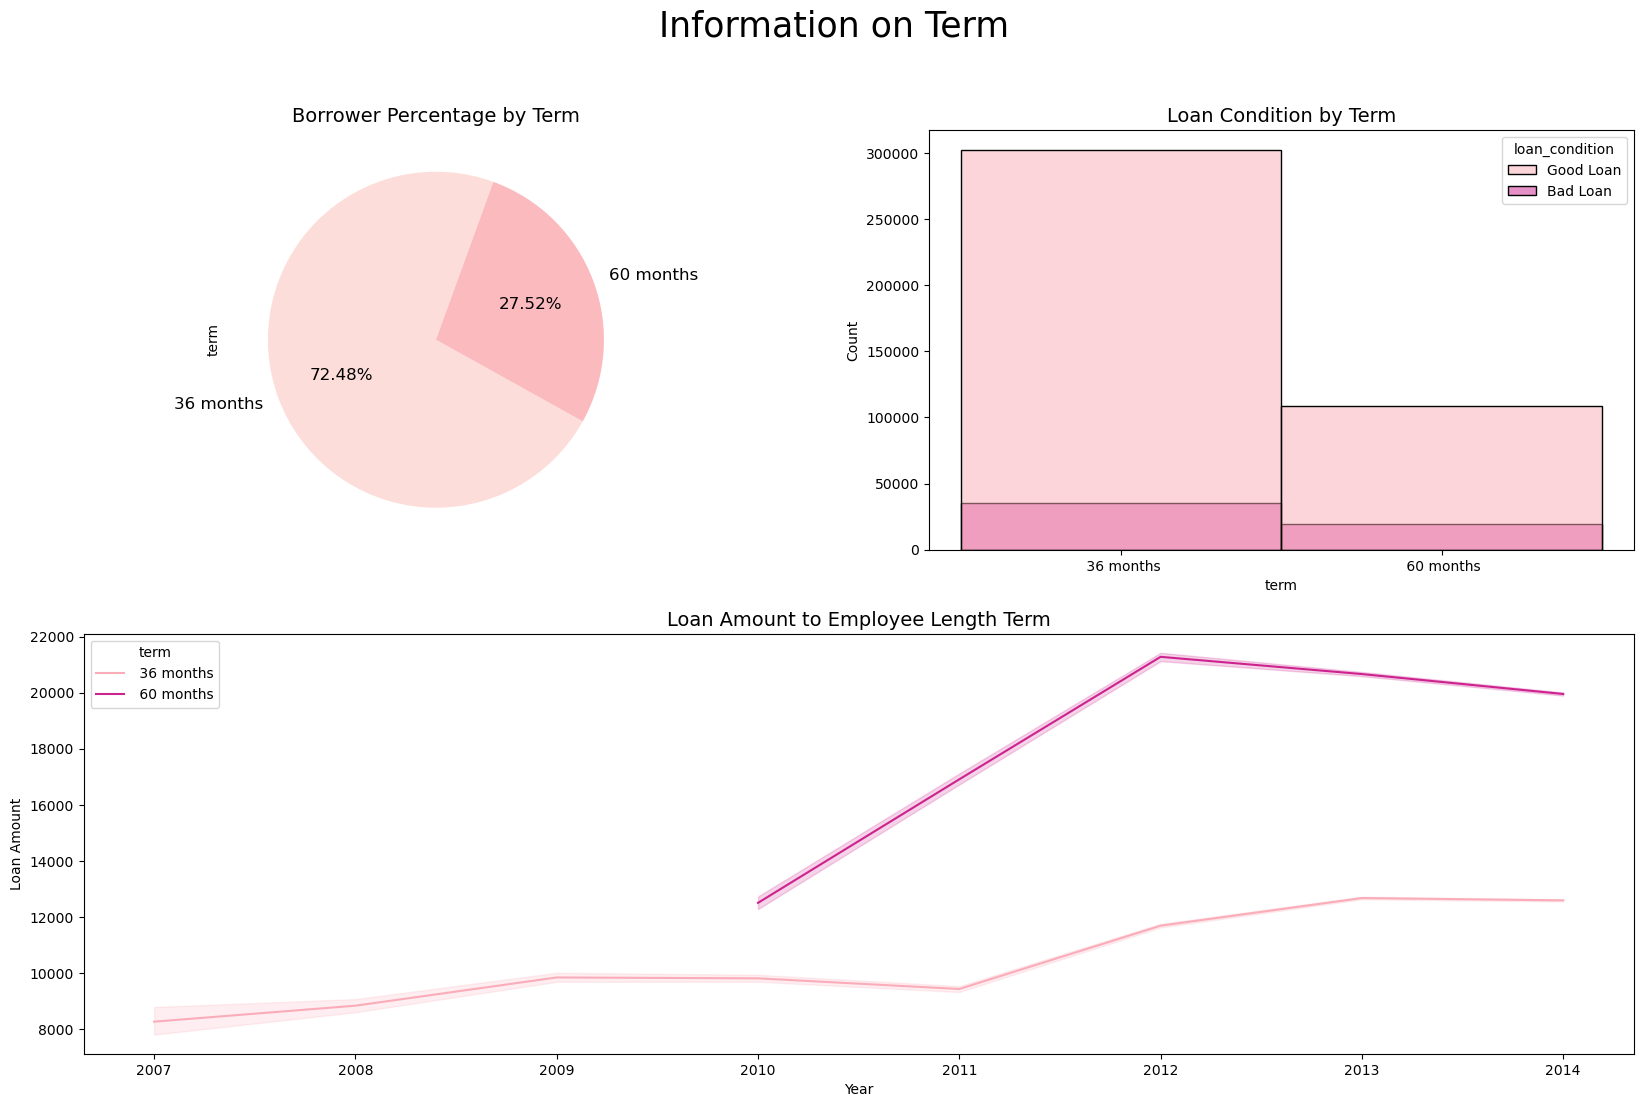

In [143]:
plt.style.use('default')
fig = plt.figure(figsize=(20,12))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

plt.suptitle('Information on Term', fontsize=25)

df["term"].value_counts().plot(kind='pie',autopct='%1.2f%%', ax=ax1, colors=(sns.color_palette('RdPu')), 
                                             labels=['36 months','60 months'], fontsize=12, startangle=70)
ax1.set_title('Borrower Percentage by Term', fontsize=14)

sns.histplot(x=df['term'],hue=df['loan_condition'],ax=ax2,palette='RdPu')
ax2.set_title('Loan Condition by Term', fontsize=14)
ax2.set(ylabel="Count")

sns.lineplot(x=df['Year'],y=df['loan_amnt'],hue=df['term'],ax=ax3,palette='RdPu')
ax3.set_title('Loan Amount to Employee Length Term', fontsize=14)
ax3.set(ylabel="Loan Amount")


plt.show()

- borrower with 36 months term have the largest percentage
- borrower with both term condition is dominated by Good Loan
- borrower with 36 months term have a little increase year after year
- borrower with 60 months term have a significant increase from 2010, and have a litte decrease start from 2012

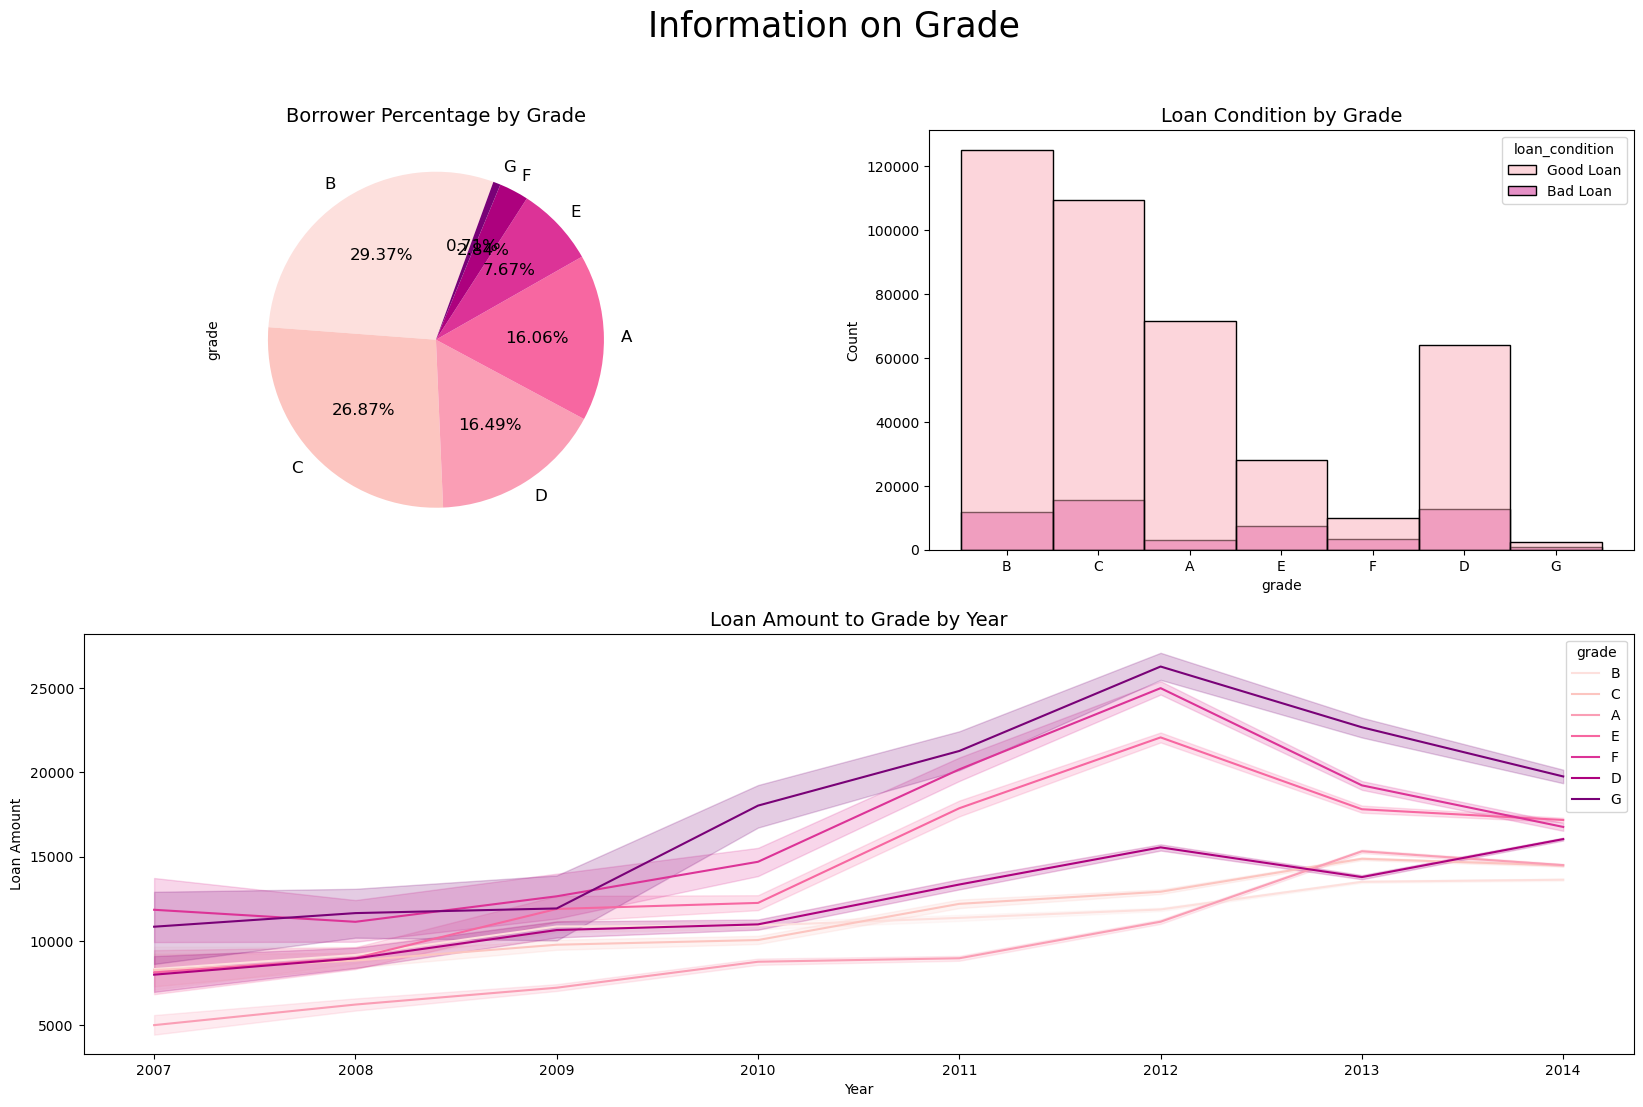

In [134]:
fig = plt.figure(figsize=(20,12))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

plt.suptitle('Information on Grade', fontsize=25)

df["grade"].value_counts().plot(kind='pie',autopct='%1.2f%%', ax=ax1, colors=(sns.color_palette("RdPu", 7)), 
                                             labels=['B', 'C', 'D', 'A', 'E', 'F', 'G'], fontsize=12, startangle=70)
ax1.set_title('Borrower Percentage by Grade', fontsize=14)

sns.histplot(x=df['grade'], hue=df['loan_condition'],ax=ax2,palette='RdPu')
ax2.set_title('Loan Condition by Grade', fontsize=14)
ax2.set(ylabel="Count")

sns.lineplot(x=df['Year'],y=df['loan_amnt'],hue=df['grade'],ax=ax3,palette='RdPu')
ax3.set_title('Loan Amount to Grade by Year', fontsize=14)
ax3.set(ylabel="Loan Amount")


plt.show()

- Borrowers with B and C grades have the highest percentages, followed by those with similar percentages.
- Good loan terms are prevalent in all grades.
- Borrowers with A, B, C, and D grades increase year after year.
- Borrowers with E, F, and G grades increase but begin to decline in 2012.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

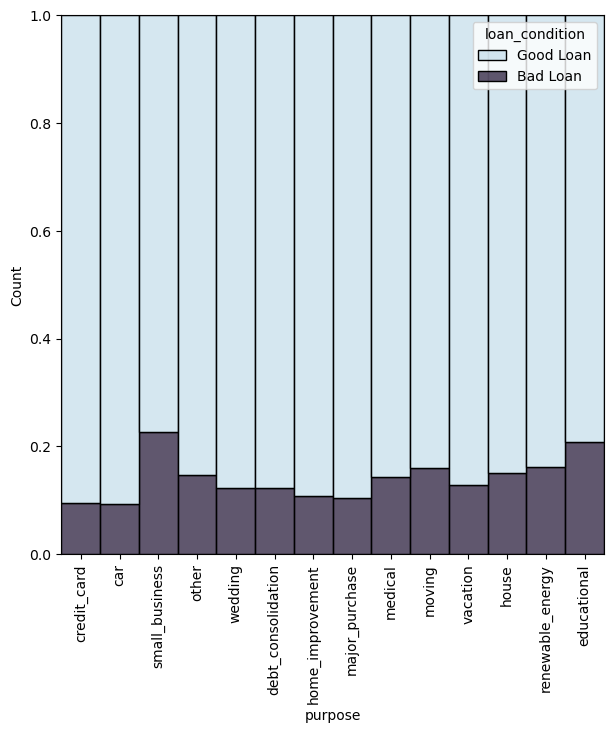

In [160]:
plt.figure(figsize=(7,7))
sns.histplot(x=df['purpose'],hue=df['loan_condition'],palette='ch:s=.25,rot=-.25', multiple='fill' )
plt.xticks(rotation=90)

## Data Preprocessing

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 82 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [48]:
df.nunique()

Unnamed: 0                     466285
id                             466285
member_id                      466285
loan_amnt                        1352
funded_amnt                      1354
funded_amnt_inv                  9854
term                                2
int_rate                          506
installment                     55622
grade                               7
sub_grade                          35
emp_title                      205475
emp_length                         11
home_ownership                      6
annual_inc                      31901
verification_status                 3
issue_d                            91
loan_status                         9
pymnt_plan                          2
url                            466285
desc                           124436
purpose                            14
title                           63099
zip_code                          888
addr_state                         50
dti                              3997
delinq_2yrs 

### Feature Selection

In [49]:
df_selection = df[['loan_amnt', 'term', 'grade', 'emp_length_category', 'home_ownership_status', 'income_category', 'verification_status', 'loan_condition', 'purpose', 'delinq_2yrs_status']]

In [50]:
df_selection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   loan_amnt              466285 non-null  int64 
 1   term                   466285 non-null  object
 2   grade                  466285 non-null  object
 3   emp_length_category    466285 non-null  object
 4   home_ownership_status  466285 non-null  object
 5   income_category        466285 non-null  object
 6   verification_status    466285 non-null  object
 7   loan_condition         466285 non-null  object
 8   purpose                466285 non-null  object
 9   delinq_2yrs_status     466285 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 35.6+ MB


In this feature selection, a new dataframe is created with features that are thought to be highly correlated with the target, with the current target column being a loan condition.

### Data Cleaning

In [51]:
df_selection.isna().sum()

loan_amnt                0
term                     0
grade                    0
emp_length_category      0
home_ownership_status    0
income_category          0
verification_status      0
loan_condition           0
purpose                  0
delinq_2yrs_status       0
dtype: int64

there's no null value in these selected features

### Feature Encoding

In [52]:
nums2 = [key for key in dict(df_selection.dtypes) if dict(df_selection.dtypes)[key] in ['float64', 'int64']]
cats2 = [key for key in dict(df_selection.dtypes) if dict(df_selection.dtypes)[key] in ['object']]

In [53]:
df_selection[nums2].describe()

,loan_amnt,delinq_2yrs_status
count,466285.000000,466285.000000
mean,14317.277577,0.178713
std,8286.509164,0.383112
min,500.000000,0.000000
25%,8000.000000,0.000000
50%,12000.000000,0.000000
75%,20000.000000,0.000000
max,35000.000000,1.000000


In [54]:
df_selection[cats2].describe()

,term,grade,emp_length_category,home_ownership_status,income_category,verification_status,loan_condition,purpose
count,466285,466285,466285,466285,466285,466285,466285,466285
unique,2,7,3,4,3,3,2,14
top,36 months,B,> 10 years,MORTGAGE,Low,Verified,Good Loan,debt_consolidation
freq,337953,136929,200679,235875,388628,168055,410953,274195


In [55]:
for col in df_selection:
    print(f'''Value count kolom {col}:''')
    print(df_selection[col].value_counts())
    print()

Value count kolom loan_amnt:
10000    33023
12000    25519
15000    23486
20000    22759
35000    16596
         ...  
34250        1
33400        1
32150        1
34325        1
33175        1
Name: loan_amnt, Length: 1352, dtype: int64

Value count kolom term:
 36 months    337953
 60 months    128332
Name: term, dtype: int64

Value count kolom grade:
B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: grade, dtype: int64

Value count kolom emp_length_category:
> 10 years    200679
< 5 years     142257
5-10 years    123349
Name: emp_length_category, dtype: int64

Value count kolom home_ownership_status:
MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          233
Name: home_ownership_status, dtype: int64

Value count kolom income_category:
Low       388628
Medium     69857
High        7800
Name: income_category, dtype: int64

Value count kolom verification_status:
Verified           168055
Source Verified    149993
Not Verified    

In [56]:
df_selection.nunique()

loan_amnt                1352
term                        2
grade                       7
emp_length_category         3
home_ownership_status       4
income_category             3
verification_status         3
loan_condition              2
purpose                    14
delinq_2yrs_status          2
dtype: int64

<AxesSubplot:>

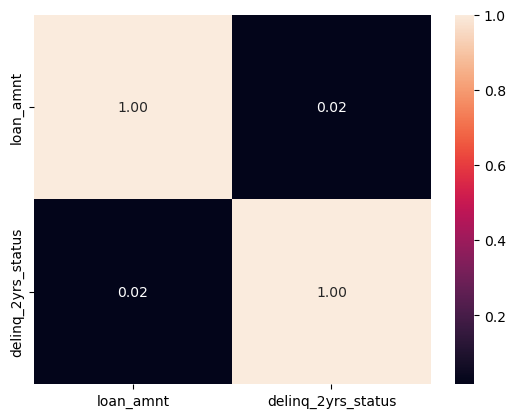

In [57]:
sns.heatmap(df_selection.corr(), annot=True,fmt='.2f')

In [58]:
df_selection['purpose'].value_counts()

debt_consolidation    274195
credit_card           104157
home_improvement       26537
other                  23690
major_purchase          9828
small_business          7013
car                     5397
medical                 4602
moving                  2994
vacation                2487
wedding                 2343
house                   2269
educational              422
renewable_energy         351
Name: purpose, dtype: int64

In [59]:
df_selection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   loan_amnt              466285 non-null  int64 
 1   term                   466285 non-null  object
 2   grade                  466285 non-null  object
 3   emp_length_category    466285 non-null  object
 4   home_ownership_status  466285 non-null  object
 5   income_category        466285 non-null  object
 6   verification_status    466285 non-null  object
 7   loan_condition         466285 non-null  object
 8   purpose                466285 non-null  object
 9   delinq_2yrs_status     466285 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 35.6+ MB


- label encoding : `grade`,`income_category`, `loan_condition`
- one hot encoding : `term`,`emp_length_category`,`home_ownership_status`,`verification_status`,`purpose`

#### label encoding for `grade`,`income_category`, `loan_condition`

In [60]:
df_selection['grade'].replace(['A', 'B', 'C', 'D', 'E', 'F', 'G'], [6, 5, 4, 3, 2, 1, 0], inplace=True)
df_selection['income_category'].replace(['Low', 'Medium', 'High'], [0,1,2], inplace=True)
df_selection['loan_condition'].replace(['Bad Loan','Good Loan'], [0, 1], inplace=True)

C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


#### one hot encoding for `term`,`emp_length_category`,`home_ownership_status`,`verification_status`,`purpose`

In [61]:
for i in ['term','emp_length_category','home_ownership_status','verification_status','purpose']:
    onehots = pd.get_dummies(df[i], prefix=i)
    df_selection = df_selection.join(onehots)

In [62]:
df_selection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 36 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   loan_amnt                            466285 non-null  int64 
 1   term                                 466285 non-null  object
 2   grade                                466285 non-null  int64 
 3   emp_length_category                  466285 non-null  object
 4   home_ownership_status                466285 non-null  object
 5   income_category                      466285 non-null  int64 
 6   verification_status                  466285 non-null  object
 7   loan_condition                       466285 non-null  int64 
 8   purpose                              466285 non-null  object
 9   delinq_2yrs_status                   466285 non-null  int64 
 10  term_ 36 months                      466285 non-null  uint8 
 11  term_ 60 months           

In [183]:
df_selection['grade'].value_counts()

5    136929
4    125293
3     76888
6     74867
2     35757
1     13229
0      3322
Name: grade, dtype: int64

In [182]:
df_selection['income_category'].value_counts()

0    388628
1     69857
2      7800
Name: income_category, dtype: int64

In [184]:
df_selection['loan_condition'].value_counts()

1    410953
0     55332
Name: loan_condition, dtype: int64

#### Drop all the columns before encoding

In [69]:
df_selection = df_selection.drop(columns=['term','emp_length_category','home_ownership_status','verification_status','purpose'])

In [70]:
df_selection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 31 columns):
 #   Column                               Non-Null Count   Dtype
---  ------                               --------------   -----
 0   loan_amnt                            466285 non-null  int64
 1   grade                                466285 non-null  int64
 2   income_category                      466285 non-null  int64
 3   loan_condition                       466285 non-null  int64
 4   delinq_2yrs_status                   466285 non-null  int64
 5   term_ 36 months                      466285 non-null  uint8
 6   term_ 60 months                      466285 non-null  uint8
 7   emp_length_category_5-10 years       466285 non-null  uint8
 8   emp_length_category_< 5 years        466285 non-null  uint8
 9   emp_length_category_> 10 years       466285 non-null  uint8
 10  home_ownership_status_MORTGAGE       466285 non-null  uint8
 11  home_ownership_status_OTHER          46

#### Check abnormal column & Standarization

In [71]:
list_col_abnormal = []

for i in df_selection:
  if df_selection[i].min() != 0 and df_selection[i].max() != 1:
    list_col_abnormal.append(i)

print(list_col_abnormal)

['loan_amnt']


In [72]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

df_selection['loan_amnt_ss'] = ss.fit_transform(df_selection['loan_amnt'].values.reshape(len(df_selection),1))

In [73]:
df_selection['loan_amnt_ss'].value_counts()

-0.521001    33023
-0.279645    25519
 0.082390    23486
 0.685781    22759
 2.495954    16596
             ...  
 2.405445        1
 2.302869        1
 2.152021        1
 2.414496        1
 2.275716        1
Name: loan_amnt_ss, Length: 1352, dtype: int64

<AxesSubplot:xlabel='loan_amnt_ss', ylabel='Density'>

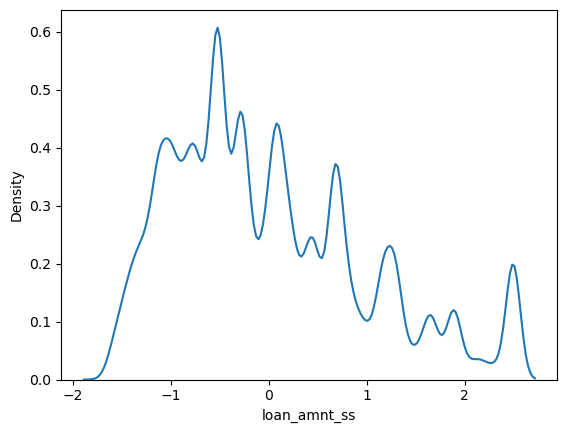

In [74]:
sns.kdeplot(x=df_selection['loan_amnt_ss'])

In [75]:
df_selection = df_selection.drop(columns=['loan_amnt'])

In [144]:
df_selection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 31 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   grade                                466285 non-null  int64  
 1   income_category                      466285 non-null  int64  
 2   loan_condition                       466285 non-null  int64  
 3   delinq_2yrs_status                   466285 non-null  int64  
 4   term_ 36 months                      466285 non-null  uint8  
 5   term_ 60 months                      466285 non-null  uint8  
 6   emp_length_category_5-10 years       466285 non-null  uint8  
 7   emp_length_category_< 5 years        466285 non-null  uint8  
 8   emp_length_category_> 10 years       466285 non-null  uint8  
 9   home_ownership_status_MORTGAGE       466285 non-null  uint8  
 10  home_ownership_status_OTHER          466285 non-null  uint8  
 11  home_ownershi

### Feature Correlation

<AxesSubplot:>

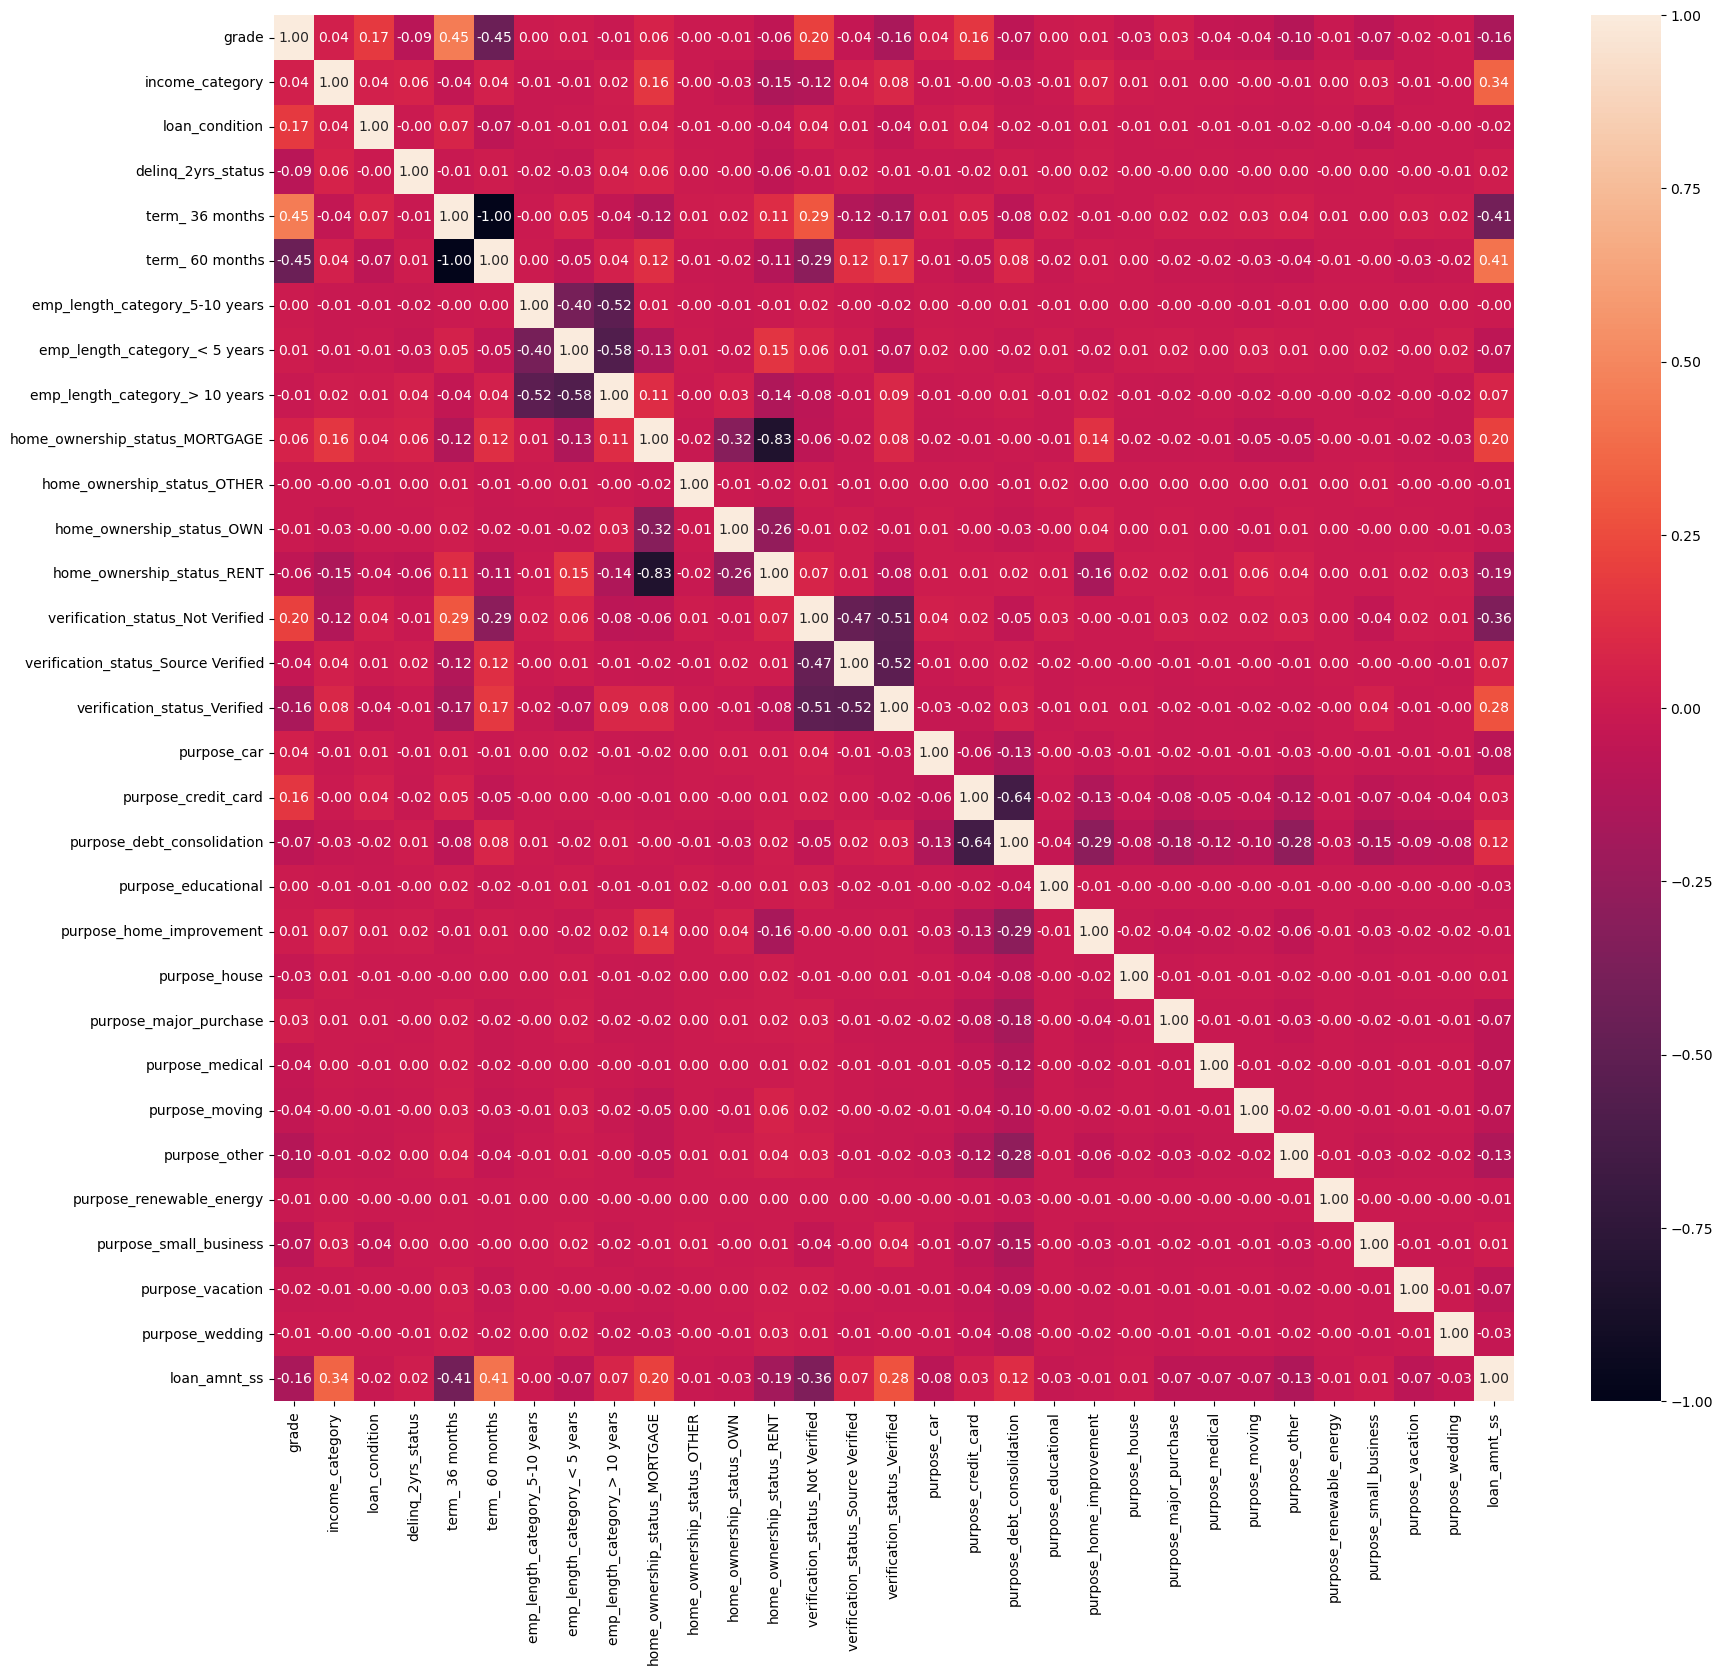

In [79]:
plt.figure(figsize=(20,18))
sns.heatmap(df_selection.corr(), annot=True,fmt='.2f')

## Modeling (Split Data, Fit Model, Predict, & Evaluation)

### Split Data

In [80]:
X = df_selection.loc[:, df_selection.columns != 'loan_condition']
y = df_selection['loan_condition']

In [81]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [146]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 30 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   grade                                466285 non-null  int64  
 1   income_category                      466285 non-null  int64  
 2   delinq_2yrs_status                   466285 non-null  int64  
 3   term_ 36 months                      466285 non-null  uint8  
 4   term_ 60 months                      466285 non-null  uint8  
 5   emp_length_category_5-10 years       466285 non-null  uint8  
 6   emp_length_category_< 5 years        466285 non-null  uint8  
 7   emp_length_category_> 10 years       466285 non-null  uint8  
 8   home_ownership_status_MORTGAGE       466285 non-null  uint8  
 9   home_ownership_status_OTHER          466285 non-null  uint8  
 10  home_ownership_status_OWN            466285 non-null  uint8  
 11  home_ownershi

### Fit Model

In [147]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

### Predict

In [148]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [149]:
model.predict_proba(X_test)

array([[0.12729923, 0.87270077],
       [0.18833393, 0.81166607],
       [0.0902203 , 0.9097797 ],
       ...,
       [0.08216803, 0.91783197],
       [0.15293457, 0.84706543],
       [0.08059646, 0.91940354]])

In [150]:
y_pred_train = model.predict(X_train)
y_pred_train

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

### Evaluation

In [185]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))

    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))

    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))

    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))

    print("ROC AUC Score (Test Set): %.2f" % roc_auc_score(y_test, y_pred))
    print("ROC AUC (Train Set): %.2f" % roc_auc_score(y_train, y_pred_train))
    
    print('Test score:' + str(model.score(X_test, y_test))) #Test score
    print('Train score: ' + str(model.score(X_train, y_train))) #Train score


    conf_mat = confusion_matrix(y_test,y_pred)
    print(conf_mat)
    print('='*100)
    print()

In [186]:
eval_classification(model)

Accuracy (Test Set): 0.88
Accuracy (Train Set): 0.88
Precision (Test Set): 0.88
Precision (Train Set): 0.88
Recall (Test Set): 1.00
Recall (Train Set): 1.00
F1-Score (Test Set): 0.94
F1-Score (Train Set): 0.94
ROC AUC Score (Test Set): 0.50
ROC AUC (Train Set): 0.50
Test score:0.8803382754528688
Train score: 0.881761279905882
[[     0  16739]
 [     0 123147]]



## Feature Importance

[[ 0.47778773  0.14853087  0.01327891  0.04934285  0.07263928  0.01894324
   0.030507    0.06478727  0.09736907 -0.00810996  0.03221909 -0.00654953
   0.05927405  0.06161533 -0.00396389  0.0214611   0.07647169  0.03127796
  -0.0171119   0.01550436  0.00245958  0.02142253  0.00254453  0.00359261
   0.0136417  -0.00286508 -0.0524057   0.01023598  0.01118271 -0.02290913]]


C:\Users\LENOVO\AppData\Local\Temp/ipykernel_8428/1209534790.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(importances['Attribute'], y=importances['Attribute'])


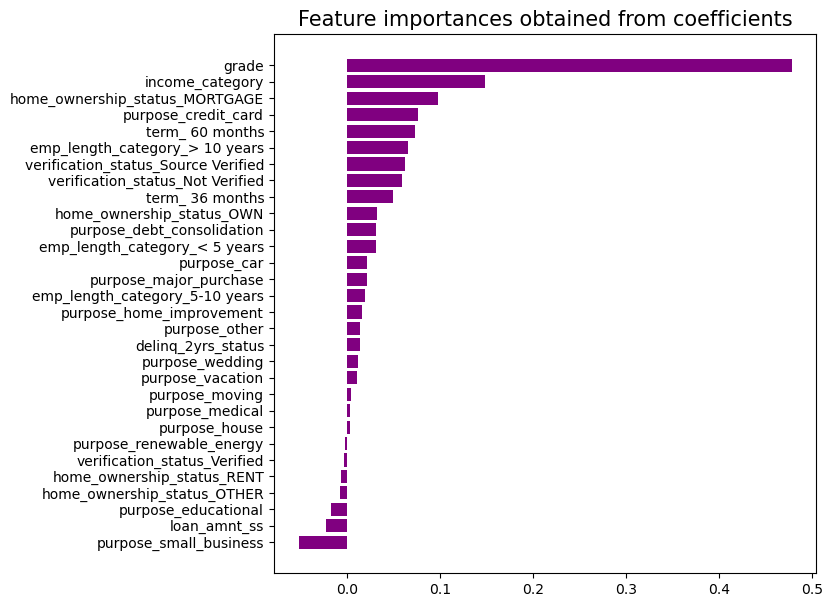

In [167]:
model.fit(X / np.std(X, 0), y)
print(model.coef_)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(7,7))

plt.title('Feature importances obtained from coefficients', size=15)

ax.barh(importances['Attribute'], importances['Importance'], align='center',color='purple')
ax.set_yticklabels(importances['Attribute'], y=importances['Attribute'])
ax.invert_yaxis()
plt.show()

In [187]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train,y_train)

eval_classification(dt_model)

Accuracy (Test Set): 0.83
Accuracy (Train Set): 0.93
Precision (Test Set): 0.89
Precision (Train Set): 0.94
Recall (Test Set): 0.92
Recall (Train Set): 0.98
F1-Score (Test Set): 0.90
F1-Score (Train Set): 0.96
ROC AUC Score (Test Set): 0.52
ROC AUC (Train Set): 0.75
Test score:0.8254507241611027
Train score: 0.928792673997163
[[  2080  14659]
 [  9758 113389]]



### Tuning Hyperparameter

In [195]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 20, num = 20)] # Maximum number of levels in tree
min_samples_split = [int(i) for i in range(100)] # Minimum number of samples required to split a node
min_samples_leaf = [int(i) for i in range(50)] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
dt_modelt = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='accuracy')
dt_modelt.fit(X_train, y_train)

# Predict & Evaluation
y_pred = dt_modelt.predict(X_test)#Check performa dari model
eval_classification(dt_modelt)

Accuracy (Test Set): 0.88
Accuracy (Train Set): 0.88
Precision (Test Set): 0.88
Precision (Train Set): 0.88
Recall (Test Set): 1.00
Recall (Train Set): 1.00
F1-Score (Test Set): 0.94
F1-Score (Train Set): 0.94
ROC AUC Score (Test Set): 0.50
ROC AUC (Train Set): 0.50
Test score:0.8803382754528688
Train score: 0.881761279905882
[[     0  16739]
 [     0 123147]]



In [196]:
print('Best max_depth:', dt_modelt.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', dt_modelt.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', dt_modelt.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', dt_modelt.best_estimator_.get_params()['max_features'])

Best max_depth: 12
Best min_samples_split: 79
Best min_samples_leaf: 48
Best max_features: sqrt


In [197]:
dt_models = DecisionTreeClassifier(max_depth = 12, min_samples_split = 79, min_samples_leaf = 48, max_features = 'sqrt', random_state=42)
dt_models.fit(X_train,y_train)

y_pred = dt_models.predict(X_test)
eval_classification(dt_models)

Accuracy (Test Set): 0.88
Accuracy (Train Set): 0.88
Precision (Test Set): 0.88
Precision (Train Set): 0.88
Recall (Test Set): 1.00
Recall (Train Set): 1.00
F1-Score (Test Set): 0.94
F1-Score (Train Set): 0.94
ROC AUC Score (Test Set): 0.50
ROC AUC (Train Set): 0.50
Test score:0.8803382754528688
Train score: 0.881761279905882
[[     0  16739]
 [     0 123147]]



In [178]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('Score')
    plt.ylabel('Feature')
    plt.title('Feature Importance Score')

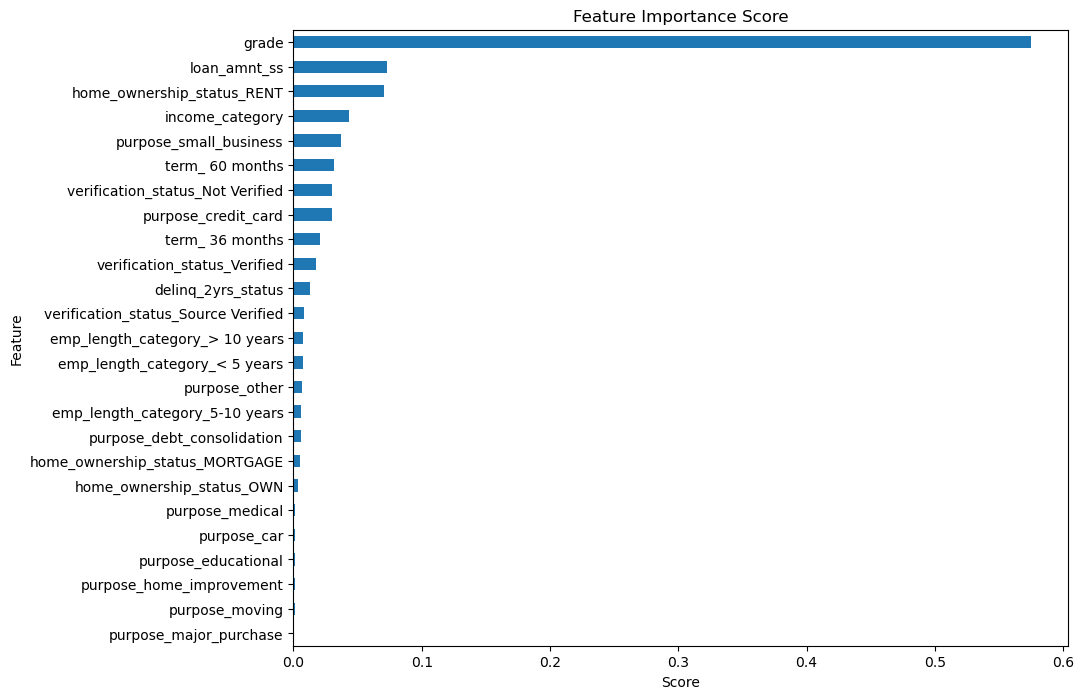

In [199]:
show_feature_importance(dt_models)